# 線性迴歸求解

## 範例1. 簡單線性迴歸
### $\begin{equation}y = wx + b\end{equation}$

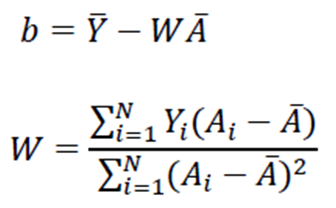

In [16]:
# OLS 公式
from IPython.display import Image
Image('./formula/regression_wb.png')

In [4]:
# 使用 OLS 公式計算 w、b
# 載入套件
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

# 載入資料集
df = pd.read_csv('./data/population.csv')

w = ((df['pop'] - df['pop'].mean()) * df['year']).sum() \
     / ((df['year'] - df['year'].mean())**2).sum()
b = df['pop'].mean() - w * df['year'].mean()

print(f'w={w}, b={b}')

w=0.061159358661557375, b=-116.35631056117687


In [5]:
# 使用 NumPy 的現成函數 polyfit()
coef = np.polyfit(df['year'], df['pop'], deg=1)
print(f'w={coef[0]}, b={coef[1]}')

w=0.061159358661554586, b=-116.35631056117121


## 矩陣計算

In [15]:
import numpy as np

X = df[['year']].values

# b = b * 1
one=np.ones((len(df), 1))

# 將 x 與 one 合併 
X = np.concatenate((X, one), axis=1)

y = df[['pop']].values

# 求解
w = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'w={w[0, 0]}, b={w[1, 0]}')

w=0.06115935866154644, b=-116.35631056115507


## 以Scikit-Learn的房價資料集為例，求解線性迴歸

In [18]:
import numpy as np
from sklearn.datasets import load_boston

# 載入 Boston 房價資料集
X, y = load_boston(return_X_y=True)

# b = b * 1
one=np.ones((X.shape[0], 1))

# 將 x 與 one 合併 
X = np.concatenate((X, one), axis=1)

# 求解
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01,  3.64594884e+01])

## 以Scikit-Learn的線性迴歸驗證

In [19]:
from sklearn.linear_model import LinearRegression

X, y = load_boston(return_X_y=True)

lr = LinearRegression()
lr.fit(X, y)

lr.coef_, lr.intercept_

(array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]),
 36.45948838509001)

## 使用PyTorch 線性代數函數庫

In [4]:
import numpy as np
from sklearn.datasets import load_boston
import torch

# 載入 Boston 房價資料集
X, y = load_boston(return_X_y=True)

X_tensor = torch.from_numpy(X)

# b = b * 1
one=torch.ones((X.shape[0], 1))

# 將 x 與 one 合併 
X = torch.cat((X_tensor, one), axis=1)


# 求解
w = torch.linalg.inv(X.T @ X) @ X.T @ y
# w = (X.T @ X).inverse() @ X.T @ y # 也可以

w

tensor([-1.0801e-01,  4.6420e-02,  2.0559e-02,  2.6867e+00, -1.7767e+01,
         3.8099e+00,  6.9222e-04, -1.4756e+00,  3.0605e-01, -1.2335e-02,
        -9.5275e-01,  9.3117e-03, -5.2476e-01,  3.6459e+01],
       dtype=torch.float64)